In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import numpy as np

In [7]:
data_path = '../../../dataset/Synthetic_LC.csv'
df = pd.read_csv(data_path)

X = df.drop(columns=['lung_cancer_risk'])
y = df['lung_cancer_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}") # Pretty Amazing!

Mean Squared Error: 96.97


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x000001D213581160>


Global SHAP Score:


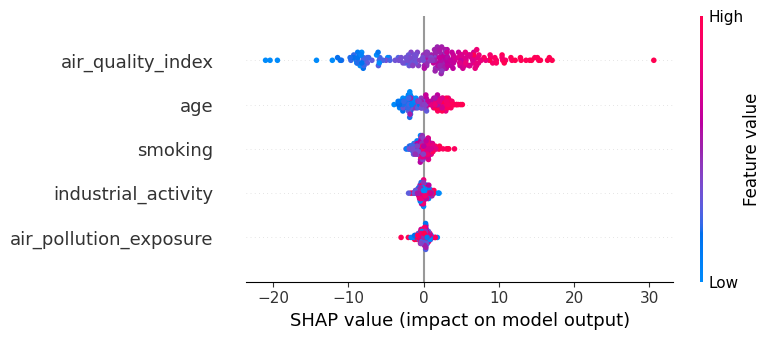

None
Average values for each column:
Column 0: 1.8654
Column 1: 0.7721
Column 2: 0.4340
Column 3: 5.8075
Column 4: 0.5020


In [8]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

print("Global SHAP Score:")
print(shap.summary_plot(shap_values, X_test))

column_averages = np.mean(np.abs(shap_values), axis=0)

print("Average values for each column:")
for i, avg in enumerate(column_averages):
    print(f"Column {i}: {avg:.4f}")